In [122]:
%pip install psycopg2-binary
%pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import psycopg2
import seaborn as sns
import pandas as pd
import squarify 
import matplotlib.pyplot as plt

In [3]:
conn = psycopg2.connect(
    dbname = 'salary_analysis_data_job_positions',
    user = 'postgres',
    password = 'Amir3525',
    host = 'localhost',
    port = '5432'
)

cur = conn.cursor()
print("Connected to the database")

Connected to the database


In [ ]:
cur.execute("SELECT * FROM salaries s LIMIT 10;")
rows = cur.fetchall()

for row in rows:
    print(rows)

# BASIC STATISTICS
### COUNTING TOTAL QUANTITY of DISTINCT job positions


### Ploting - Quantity of data job positions

In [ ]:
cur.execute("""
SELECT
	COUNT(DISTINCT s.job_title)
FROM
	salaries s
""")
rows = cur.fetchall()

for row in rows:
    print("The number of different job positions is: ",rows)

('Data Scientist', 13156)
('Data Engineer', 10883)
('Software Engineer', 9596)
('Data Analyst', 8652)
('Machine Learning Engineer', 6443)
('Engineer', 5344)
('Manager', 3488)
('Research Scientist', 2553)
('Analyst', 2066)
('Applied Scientist', 1778)


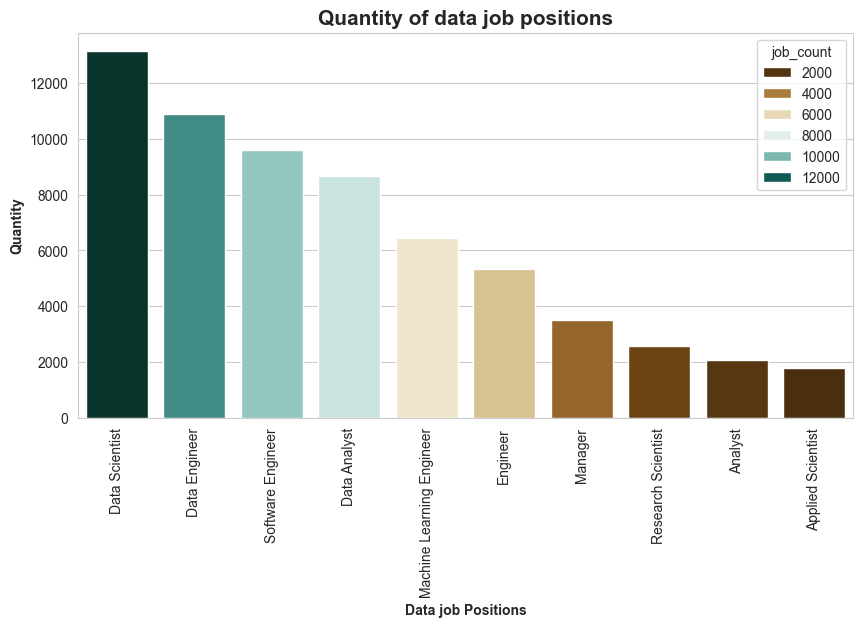

In [14]:
cur.execute("""
SELECT 
	s.job_title,
	COUNT(s.job_title) AS job_count
FROM	
	salaries s
GROUP BY	
	s.job_title
ORDER BY 
	COUNT(s.job_title) DESC
LIMIT
	10;
""")
rows = cur.fetchall()

for row in rows:
    print(row)
# Defining the query as a Dataframe
top_10_data_jobs = pd.DataFrame(rows, columns = ['job_title', 'job_count'])

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.barplot(x = "job_title", y = "job_count", data = top_10_data_jobs, hue = "job_count", palette = "BrBG")
plt.xticks(rotation = 90)
plt.ylabel("Quantity", weight="bold", size = 10)
plt.xlabel("Data job Positions", weight="bold", size = 10)
plt.title("Quantity of data job positions", weight = "bold", size = 15.0)
plt.show()

## Career Choice & Job Trends

### 1. Best Roles (part-time) for Beginners


### Ploting - best roles (part-time) for beginners

('EN', 'AI Software Engineer', 'PT', Decimal('117647.00'))
('EN', 'Analyst', 'PT', Decimal('100000.00'))
('EN', 'Data Scientist', 'PT', Decimal('92628.12'))
('EN', 'Applied Scientist', 'PT', Decimal('91545.00'))
('EN', 'Business Intelligence Engineer', 'PT', Decimal('90630.00'))
('EN', 'Data Analyst', 'PT', Decimal('77156.45'))
('EN', 'Business Intelligence Developer', 'PT', Decimal('66000.00'))
('EN', 'Software Engineer', 'PT', Decimal('63000.00'))
('EN', 'AI Developer', 'PT', Decimal('62962.50'))
('EN', 'BI Analyst', 'PT', Decimal('62400.00'))


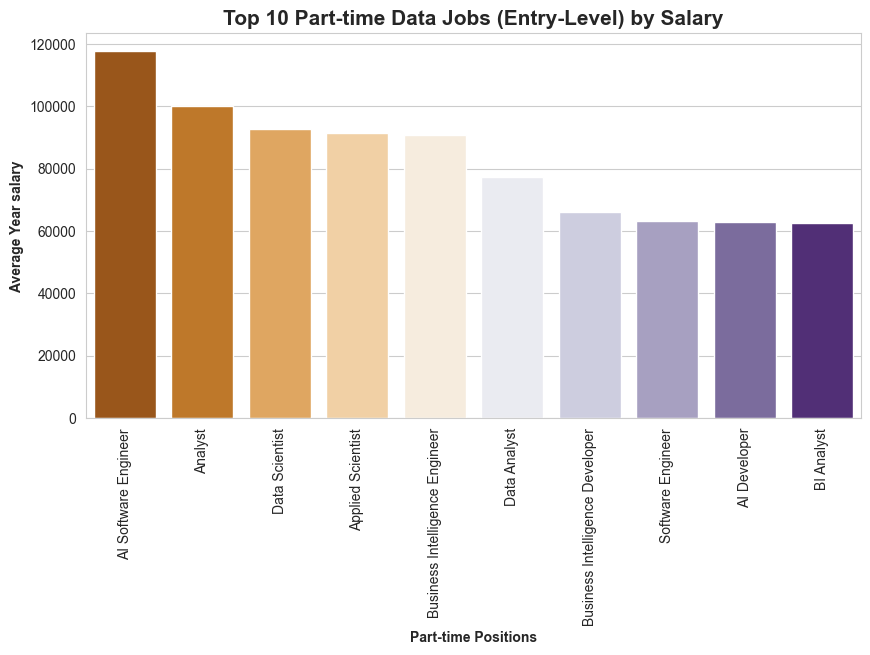

In [12]:
cur.execute("""
SELECT 
	s.experience_level,
	s.job_title,
	s.employment_type,
	ROUND(AVG(s.salary_in_usd),2) AS average_salary
FROM	
	salaries s
WHERE
	s.experience_level = 'EN'
	AND s.employment_type = 'PT'
GROUP BY
	s.job_title,
	s.experience_level,
	s.employment_type
ORDER BY
	AVG(s.salary_in_usd) DESC
LIMIT 10;
""")
rows = cur.fetchall()

for row in rows:
    print(row)
    
# Defining the query as a Dataframe
roles_pt = pd.DataFrame(rows, columns = ['experience_level', 'job_title', 'employment_type', 'average_salary'])

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.barplot(x = "job_title", y = "average_salary", data = roles_pt, palette = "PuOr", hue = "job_title")
plt.xticks(rotation = 90)
plt.ylabel("Average Year salary", weight="bold", size = 10)
plt.xlabel("Part-time Positions", weight="bold", size = 10)
plt.title("Top 10 Part-time Data Jobs (Entry-Level) by Salary", weight = "bold", size = 15.0)
plt.show()


### 1.2. Best Roles (full-time) for Beginners


### Ploting - Best roles full-time for beginners

('EN', 'Head of Data', 'FT', Decimal('240500.00'))
('EN', 'Engineering Manager', 'FT', Decimal('217800.00'))
('EN', 'AI Researcher', 'FT', Decimal('197513.33'))
('EN', 'Research Scientist', 'FT', Decimal('193336.69'))
('EN', 'Architect', 'FT', Decimal('181950.00'))
('EN', 'Machine Learning Model Engineer', 'FT', Decimal('180000.00'))
('EN', 'Quantitative Researcher', 'FT', Decimal('175000.00'))
('EN', 'Data Analytics Lead', 'FT', Decimal('165350.00'))
('EN', 'Applied Scientist', 'FT', Decimal('151404.48'))
('EN', 'Business Intelligence Lead', 'FT', Decimal('150747.50'))


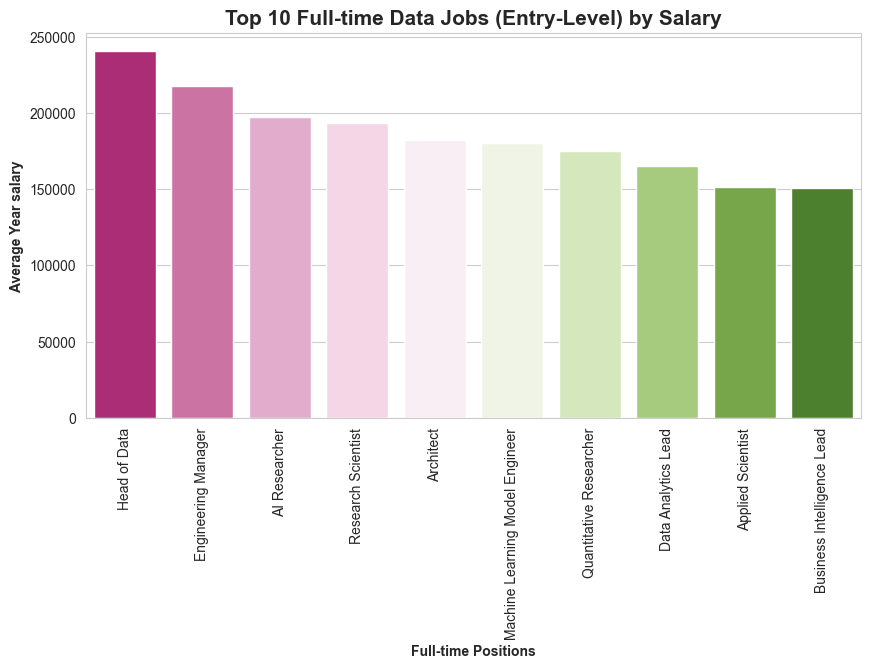

In [13]:
cur.execute("""
SELECT 
	s.experience_level,
	s.job_title,
	s.employment_type,
	ROUND(AVG(s.salary_in_usd),2) AS average_salary_ft
FROM	
	salaries s
WHERE
	s.experience_level = 'EN'
    AND s.employment_type = 'FT'
GROUP BY
	s.job_title,
	s.experience_level,
	s.employment_type
ORDER BY
	AVG(s.salary_in_usd) DESC
LIMIT 10;

""")
rows = cur.fetchall()

for row in rows:
    print(row)
    
# Defining the query as a Dataframe
roles_ft = pd.DataFrame(rows, columns = ['experience_level', 'job_title', 'employment_type', 'average_salary_ft'])

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.barplot(x = "job_title", y = "average_salary_ft", data = roles_ft, palette = "PiYG", hue = "job_title")
plt.xticks(rotation = 90)
plt.ylabel("Average Year salary", weight="bold", size = 10)
plt.xlabel("Full-time Positions", weight="bold", size = 10)
plt.title("Top 10 Full-time Data Jobs (Entry-Level) by Salary", weight = "bold", size = 15.0)
plt.show()

## 2. Remote, Hybrid, or In-Person Preferences

### Ploting - remote ratio

(36, 100, 2020)
(21, 50, 2020)
(18, 0, 2020)
(116, 100, 2021)
(73, 50, 2021)
(29, 0, 2021)
(887, 100, 2022)
(710, 0, 2022)
(63, 50, 2022)
(5775, 0, 2023)
(2674, 100, 2023)
(73, 50, 2023)
(50325, 0, 2024)
(11855, 100, 2024)
(54, 50, 2024)
(12723, 0, 2025)
(3140, 100, 2025)
(12, 50, 2025)


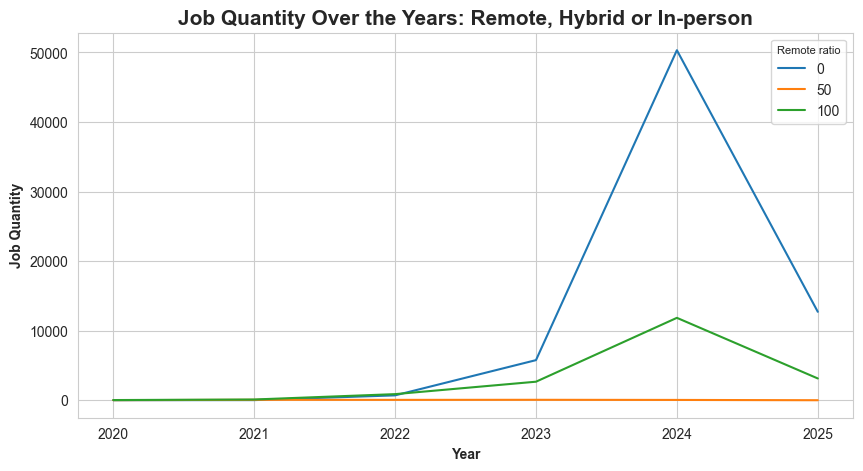

In [80]:
cur.execute("""
SELECT 
	COUNT(s.job_title) AS total_work_types,
	s.remote_ratio,
	s.work_year
FROM
	salaries s
GROUP BY
	s.remote_ratio,
	s.work_year
ORDER BY 
	s.work_year,
	COUNT(s.job_title) DESC
""")

rows = cur.fetchall()

for row in rows:
    print(row)

# Defining the query as a Dataframe
remote_ratio = pd.DataFrame(rows, columns = ['remote_ratio', 'total_work_types','work_year'])


plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

sns.lineplot(x = "work_year", y = "remote_ratio", hue = "total_work_types", data = remote_ratio, markers = 'o', palette = "tab10")

plt.xlabel("Year", weight="bold", size = 10)
plt.ylabel("Job Quantity", weight = "bold", size = 10)
plt.title("Job Quantity Over the Years: Remote, Hybrid or In-person", weight="bold", size = 15.0)
plt.legend(title = "Remote ratio", title_fontsize = '8')
plt.show()

## 2.2. Remote, Hybrid, or In-Person by company location
### Ploting - remote

(16772, 'US', 100)
(782, 'CA', 100)
(348, 'GB', 100)
(86, 'ES', 100)
(65, 'IN', 100)
(61, 'BR', 100)
(60, 'AR', 100)
(54, 'DE', 100)
(43, 'PL', 100)
(39, 'MX', 100)


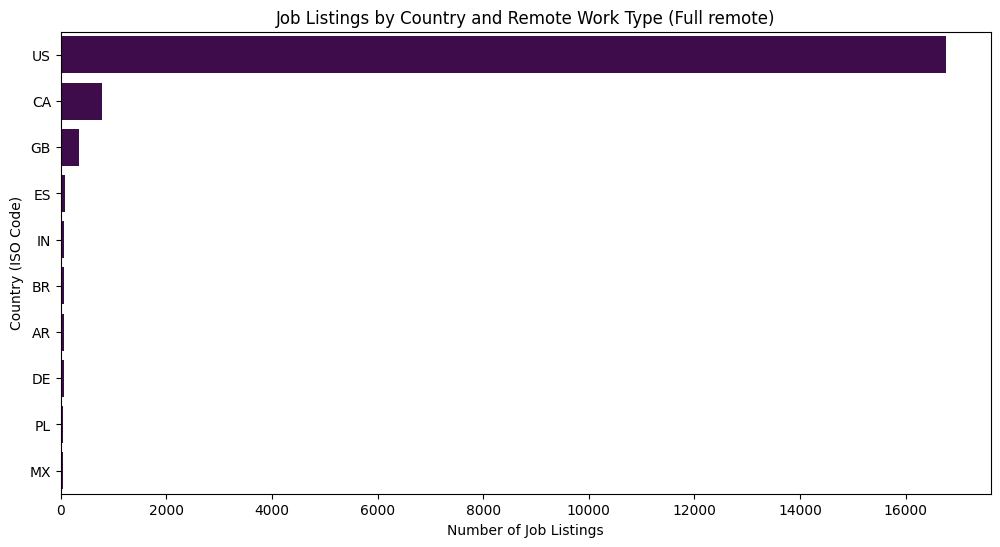

In [16]:
cur.execute("""
SELECT 
    COUNT(job_title) AS total_work_types,
    s.company_location,
    s.remote_ratio    
FROM
    salaries s
WHERE
    s.remote_ratio = '100'
GROUP BY
    s.remote_ratio,
    s.company_location
ORDER BY 
    total_work_types DESC,
    s.remote_ratio
LIMIT
    10
""")

rows = cur.fetchall()

for row in rows:
    print(row)

remote_ratio = pd.DataFrame(rows, columns = ['total_work_types','company_location', 'remote_ratio'])

plt.figure(figsize=(12, 6))
sns.barplot(x = "total_work_types", y = "company_location", hue = "remote_ratio", data = remote_ratio, palette = "viridis", legend = False)
plt.xlabel("Number of Job Listings")
plt.ylabel("Country (ISO Code)")
plt.title("Job Listings by Country and Remote Work Type (Full remote)")
plt.show()

## 2.3. Remote, Hybrid, or In-Person by company location
### Ploting - Hybrid work

(55, 'US', 50)
(30, 'GB', 50)
(28, 'DE', 50)
(27, 'FR', 50)
(23, 'IN', 50)
(22, 'CA', 50)
(12, 'NL', 50)
(8, 'AU', 50)
(7, 'ES', 50)
(6, 'IT', 50)


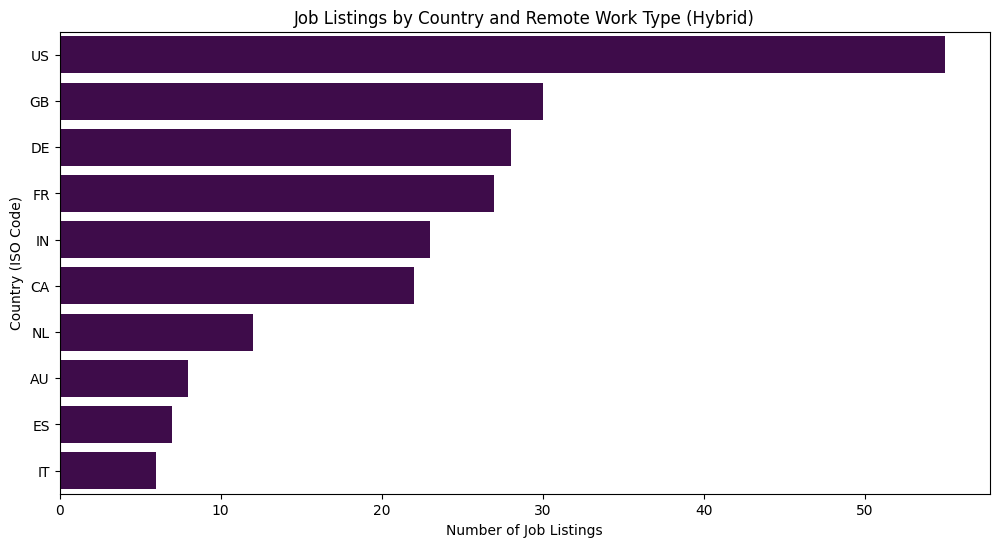

In [11]:
cur.execute("""
SELECT 
    COUNT(job_title ) AS total_work_types,
    s.company_location,
    s.remote_ratio    
FROM
    salaries s
WHERE
	s.remote_ratio = '50'
GROUP BY
    s.remote_ratio,
    s.company_location
ORDER BY 
    total_work_types DESC
LIMIT 10
""")

rows = cur.fetchall()

for row in rows:
    print(row)

hybrid_ratio = pd.DataFrame(rows, columns = ['total_work_types','company_location', 'remote_ratio'])

plt.figure(figsize=(12, 6))
sns.barplot(x = "total_work_types", y = "company_location", hue = "remote_ratio", data = hybrid_ratio, palette = "viridis", legend = False)
plt.xlabel("Number of Job Listings")
plt.ylabel("Country (ISO Code)")
plt.title("Job Listings by Country and Remote Work Type (Hybrid)")
plt.show()

## 2.3. Remote, Hybrid, or In-Person by company location
### Ploting - IN-PERSON work

(62935, 'US', 0)
(2400, 'CA', 0)
(2206, 'GB', 0)
(280, 'AU', 0)
(200, 'LT', 0)
(190, 'DE', 0)
(157, 'AT', 0)
(155, 'FR', 0)
(154, 'NL', 0)
(110, 'SK', 0)


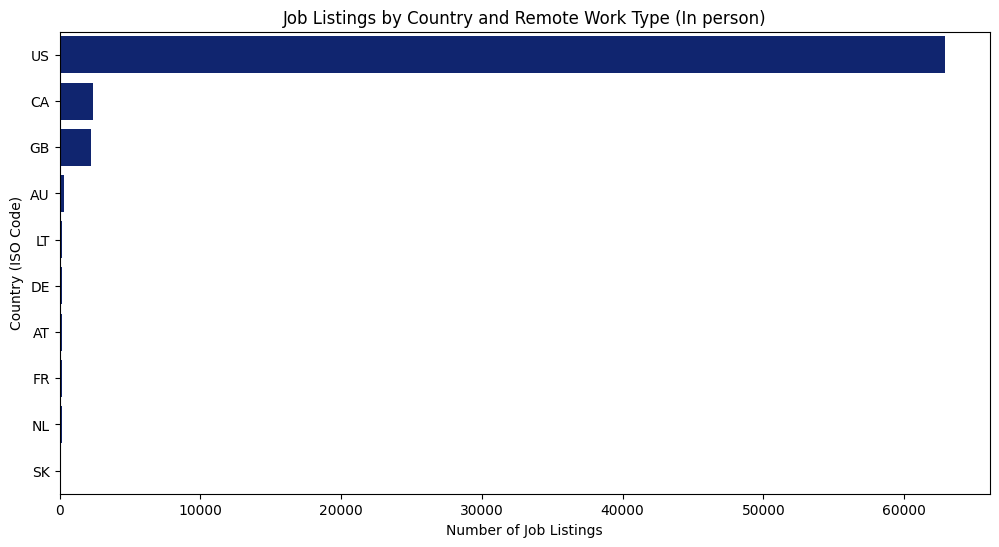

In [15]:
cur.execute("""
SELECT 
    COUNT(job_title ) AS total_work_types,
    s.company_location,
    s.remote_ratio    
FROM
    salaries s
WHERE
	s.remote_ratio = '0'
GROUP BY
    s.remote_ratio,
    s.company_location
ORDER BY 
    total_work_types DESC
LIMIT 10
""")

rows = cur.fetchall()

for row in rows:
    print(row)

inperson_ratio = pd.DataFrame(rows, columns = ['total_work_types','company_location', 'remote_ratio'])

plt.figure(figsize=(12, 6))
sns.barplot(x = "total_work_types", y = "company_location", hue = "remote_ratio", data = inperson_ratio, legend = False, palette = "dark")
plt.xlabel("Number of Job Listings")
plt.ylabel("Country (ISO Code)")
plt.title("Job Listings by Country and Remote Work Type (In person)")
plt.show()

### Plot test - tree map

In [ ]:
inperson_ratio['label'] = inperson_ratio['company_location'] + "\n" + inperson_ratio['remote_ratio'].astype(str)

plt.figure(figsize=(12, 6))
squarify.plot(sizes = inperson_ratio["total_work_types"], label = inperson_ratio["label"], alpha = 0.8, color=sns.color_palette("tab10", len(inperson_ratio)))
plt.axis("off")
plt.title("Job Listings by Country and Remote Work Type")
plt.show()

## 3. Career Growth Potential
### Ploting - Career growth potential

('EN', Decimal('69840.67'), 2020)
('MI', Decimal('91870.94'), 2020)
('SE', Decimal('138648.89'), 2020)
('EX', Decimal('179958.25'), 2020)
('EN', Decimal('63463.07'), 2021)
('MI', Decimal('86818.39'), 2021)
('SE', Decimal('125989.75'), 2021)
('EX', Decimal('186128.00'), 2021)
('EN', Decimal('79464.09'), 2022)
('MI', Decimal('102745.58'), 2022)
('SE', Decimal('147768.97'), 2022)
('EX', Decimal('184738.09'), 2022)
('EN', Decimal('91036.20'), 2023)
('MI', Decimal('123773.66'), 2023)
('SE', Decimal('165421.03'), 2023)
('EX', Decimal('191006.75'), 2023)
('EN', Decimal('103436.13'), 2024)
('MI', Decimal('145683.71'), 2024)
('SE', Decimal('175706.64'), 2024)
('EX', Decimal('201624.67'), 2024)
('EN', Decimal('93730.56'), 2025)
('MI', Decimal('141752.10'), 2025)
('SE', Decimal('171353.63'), 2025)
('EX', Decimal('204190.57'), 2025)


<Figure size 1200x600 with 0 Axes>

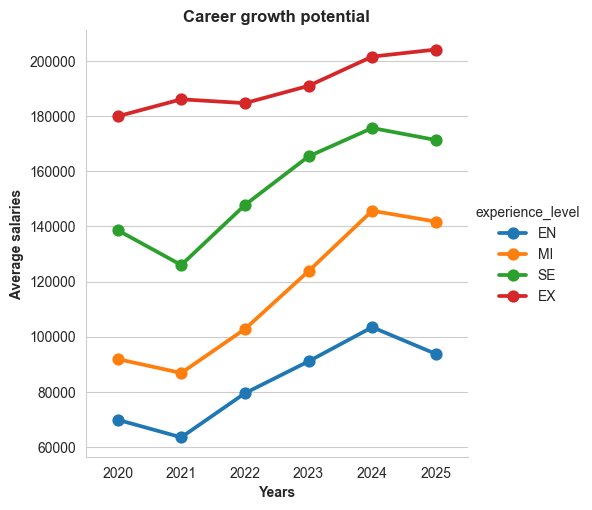

In [33]:
cur.execute("""
SELECT
	s.experience_level, 
	ROUND(AVG(s.salary_in_usd),2) AS average_salary,
	s.work_year
FROM
	salaries s
GROUP BY
	s.work_year,
	s.experience_level
ORDER BY
	s.work_year,
	CASE 
        WHEN s.experience_level = 'EN' THEN 1
        WHEN s.experience_level = 'MI' THEN 2
        WHEN s.experience_level = 'SE' THEN 3
        WHEN s.experience_level = 'EX' THEN 4
    END;
""")

rows = cur.fetchall()

for row in rows:
    print(row)
    
growth = pd.DataFrame(rows, columns = ["experience_level","average_salary","work_year"])

plt.figure(figsize=(12, 6))
sns.catplot(x = "work_year", y = "average_salary", hue = "experience_level", data = growth, kind = "point", palette = "tab10")
plt.xlabel("Years", weight = 'bold')
plt.ylabel("Average salaries", weight = 'bold')
plt.title("Career growth potential", weight = 'bold')
plt.show()


## 3.2. Career Growth Potential
### Data Scientists
### Ploting - Growth potential Data Scientists

('EN', Decimal('69840.67'), 2020)
('MI', Decimal('91870.94'), 2020)
('SE', Decimal('138648.89'), 2020)
('EX', Decimal('179958.25'), 2020)
('EN', Decimal('63463.07'), 2021)
('MI', Decimal('86818.39'), 2021)
('SE', Decimal('125989.75'), 2021)
('EX', Decimal('186128.00'), 2021)
('EN', Decimal('79464.09'), 2022)
('MI', Decimal('102745.58'), 2022)
('SE', Decimal('147768.97'), 2022)
('EX', Decimal('184738.09'), 2022)
('EN', Decimal('91036.20'), 2023)
('MI', Decimal('123773.66'), 2023)
('SE', Decimal('165421.03'), 2023)
('EX', Decimal('191006.75'), 2023)
('EN', Decimal('103436.13'), 2024)
('MI', Decimal('145683.71'), 2024)
('SE', Decimal('175706.64'), 2024)
('EX', Decimal('201624.67'), 2024)
('EN', Decimal('93730.56'), 2025)
('MI', Decimal('141752.10'), 2025)
('SE', Decimal('171353.63'), 2025)
('EX', Decimal('204190.57'), 2025)


<Figure size 1200x600 with 0 Axes>

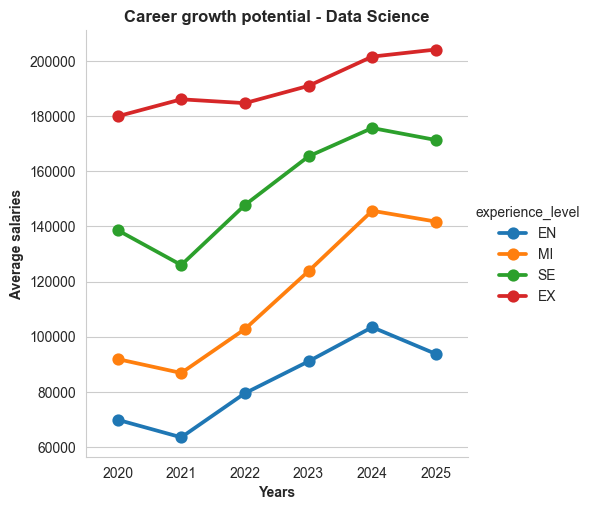

In [31]:
cur.execute("""
SELECT
	s.experience_level, 
	ROUND(AVG(s.salary_in_usd),2) AS average_salary,
	s.work_year
FROM
	salaries s
GROUP BY
	s.work_year,
	s.experience_level
ORDER BY
	s.work_year,
	CASE 
        WHEN s.experience_level = 'EN' THEN 1
        WHEN s.experience_level = 'MI' THEN 2
        WHEN s.experience_level = 'SE' THEN 3
        WHEN s.experience_level = 'EX' THEN 4
    END;
""")

rows = cur.fetchall()

for row in rows:
    print(row)
    
growth_ds = pd.DataFrame(rows, columns = ["experience_level","average_salary","work_year"])

plt.figure(figsize=(12, 6))
sns.catplot(x = "work_year", y = "average_salary", hue = "experience_level", data = growth_ds, kind = "point", palette = "tab10")
plt.xlabel("Years", weight = 'bold')
plt.ylabel("Average salaries", weight = 'bold')
plt.title("Career growth potential - Data Science", weight = 'bold')
plt.show()

## 4. Comparing earnings across employment type and the most common employment type.

('PT', 233, Decimal('76034.682403433476'))
('FT', 88111, Decimal('157959.297556491244'))
('CT', 224, Decimal('96016.437500000000'))
('FL', 16, Decimal('50651.562500000000'))


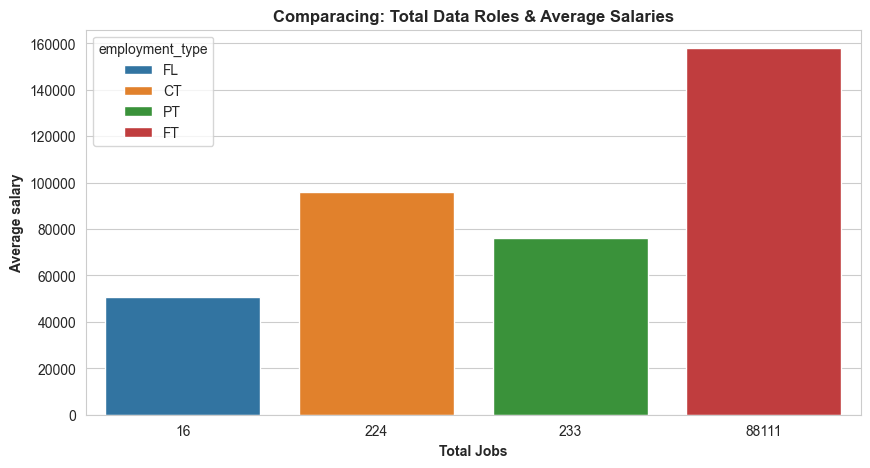

In [36]:
cur.execute("""
SELECT
	s.employment_type,
	COUNT(s.employment_type) AS total_jobs_types,
	AVG(s.salary_in_usd) AS avg_salary_job_type
FROM
	salaries s
GROUP BY
	s.employment_type
ORDER BY
	CASE 
        WHEN s.employment_type = 'PT' THEN 1
        WHEN s.employment_type = 'FT' THEN 2
        WHEN s.employment_type = 'CT' THEN 3
        WHEN s.employment_type = 'FL' THEN 4
	END;
""")

rows = cur.fetchall()

for row in rows:
    print(row)
    
# Defining the query as a Dataframe
data_roles = pd.DataFrame(rows, columns = ['employment_type','total_jobs_types','avg_salary_job_type'])

plt.figure(figsize=(10, 5))
sns.barplot(x = "total_jobs_types", y = "avg_salary_job_type", hue = 'employment_type',data = data_roles, palette = "tab10")
plt.ylabel("Average salary",  weight = 'bold')
plt.xlabel("Total Jobs", weight = 'bold')
plt.title("Comparacing: Total Data Roles & Average Salaries",  weight = 'bold')
plt.show()

## 4.2. Comparing earnings across employment_type and the most common employment type.
### Data Scientists

('PT', 34, Decimal('90971.09'))
('FT', 13108, Decimal('157486.84'))
('CT', 12, Decimal('107972.25'))
('FL', 2, Decimal('60500.00'))


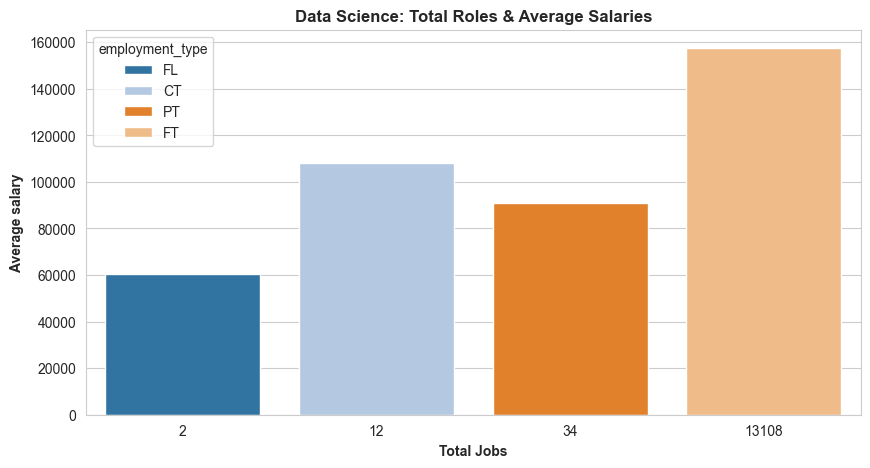

In [37]:
cur.execute("""
SELECT
	s.employment_type,
	COUNT(s.employment_type) AS total_jobs_types,
	ROUND(AVG(s.salary_in_usd),2) AS avg_salary_job_type
FROM
	salaries s
WHERE 
	s.job_title = 'Data Scientist'
GROUP BY
	s.employment_type
ORDER BY
	CASE 
        WHEN s.employment_type = 'PT' THEN 1
        WHEN s.employment_type = 'FT' THEN 2
        WHEN s.employment_type = 'CT' THEN 3
        WHEN s.employment_type = 'FL' THEN 4
	END;
""")

rows = cur.fetchall()

for row in rows:
    print(row)

# Defining the query as a Dataframe
ds_role_salary = pd.DataFrame(rows, columns = ['employment_type','total_jobs_types','avg_salary_job_type'])

plt.figure(figsize=(10, 5))
sns.barplot(x = "total_jobs_types", y = "avg_salary_job_type", hue = 'employment_type',data = ds_role_salary, palette = "tab20")
plt.ylabel("Average salary",  weight = 'bold')
plt.xlabel("Total Jobs", weight = 'bold')
plt.title("Data Science: Total Roles & Average Salaries",  weight = 'bold')
plt.show()

## 5. Yearly Salary Trends

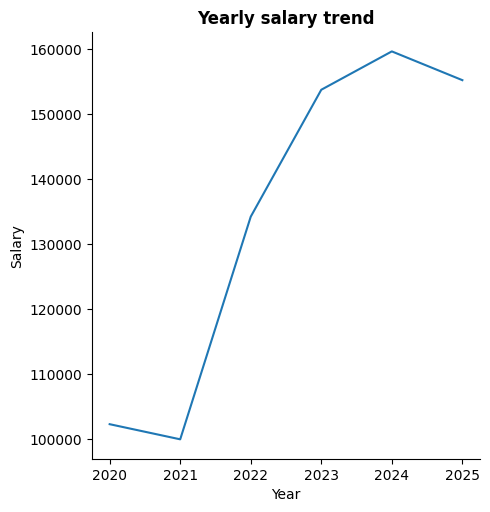

In [10]:
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT work_year, AVG (salary_in_usd) AS salary FROM salaries GROUP BY work_year ORDER BY work_year ASC")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['Year', 'Salary']
sns.relplot (x= 'Year' , y='Salary', data= df, kind= 'line')
plt.title("Yearly salary trend", weight = 'bold')
plt.show()

## 5.2 EMPLOYMENT TYPE AND THE AVERANGE SALARY OF ENTRANCE LEVEL

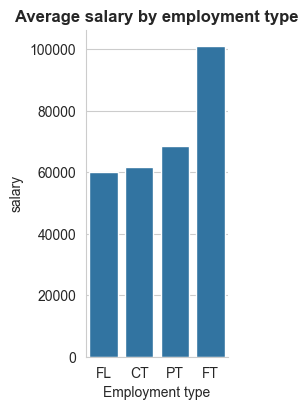

In [38]:
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT employment_type, AVG (salary_in_usd) AS salary FROM salaries WHERE experience_level = 'EN' GROUP BY employment_type ORDER BY salary")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['employment_type', 'salary']
sns.catplot (x= 'employment_type' , y='salary', data= df, kind = "bar",  height=4, aspect=.6)
plt.title("Average salary by employment type", weight = 'bold')
plt.xlabel("Employment type")

plt.show()

## 6. Company Growth & Hiring Trends 

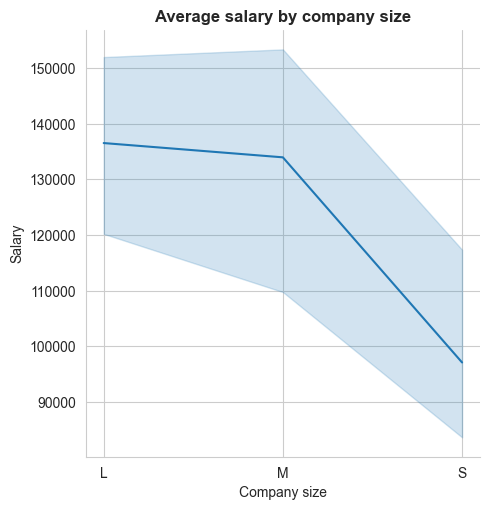

In [43]:
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT work_year AS year,company_size, AVG (salary_in_usd) AS salary FROM salaries GROUP BY company_size, year ORDER BY company_size")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['Year','company_size', 'Salary' ]
sns.relplot (x= 'company_size' , y='Salary', data = df, kind = 'line')
plt.title("Average salary by company size", weight = 'bold')
plt.xlabel("Company size")
plt.show()

## 6.2 Company size, remote ratio and salary

Text(0.5, 1.0, 'Company size, remote ratio and salary')

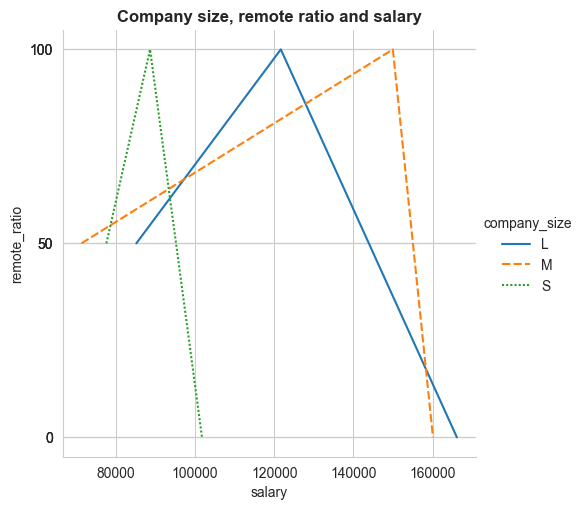

In [73]:
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT company_size, remote_ratio, AVG (salary_in_usd) AS salary FROM salaries GROUP BY company_size, remote_ratio ORDER BY company_size ASC")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['company_size','remote_ratio','salary' ]
sns.relplot (x= 'salary' , y='remote_ratio', data= df, kind= 'line', style= "company_size", hue= "company_size")
plt.yticks(df["remote_ratio"])
plt.title("Company size, remote ratio and salary", weight = 'bold')



## 6.3 Remote ratio, employment type and salary

Text(0.5, 1.0, 'Remote ratio, Employment type and Salary')

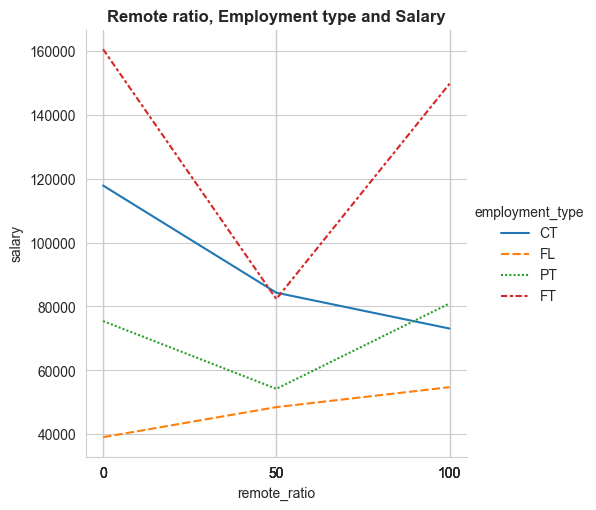

In [74]:
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT employment_type, remote_ratio, AVG (salary_in_usd) AS salary FROM salaries GROUP BY employment_type, remote_ratio ORDER BY remote_ratio")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['employment_type','remote_ratio', 'salary' ]
sns.relplot (x= 'remote_ratio' , y='salary', data= df, kind= 'line', style= "employment_type", hue= "employment_type")
plt.xticks(df["remote_ratio"])
plt.title("Remote ratio, Employment type and Salary", weight = 'bold')


## 7. Impact of Region on Salaries

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89],
 [Text(0, 0, 'QA'),
  Text(1, 0, 'VE'),
  Text(2, 0, 'CZ'),
  Text(3, 0, 'US'),
  Text(4, 0, 'PR'),
  Text(5, 0, 'IL'),
  Text(6, 0, 'SA'),
  Text(7, 0, 'EG'),
  Text(8, 0, 'CA'),
  Text(9, 0, 'AU'),
  Text(10, 0, 'LB'),
  Text(11, 0, 'NZ'),
  Text(12, 0, 'CH'),
  Text(13, 0, 'SG'),
  Text(14, 0, 'BE'),
  Text(15, 0, 'SE'),
  Text(16, 0, 'UA'),
  Text(17, 0, 'IE'),
  Text(18, 0, 'DE'),
  Text(19, 0, 'DZ'),
  Text(20, 0, 'IQ'),
  Text(21, 0, 'IR'),
  Text(22, 0, 'CN

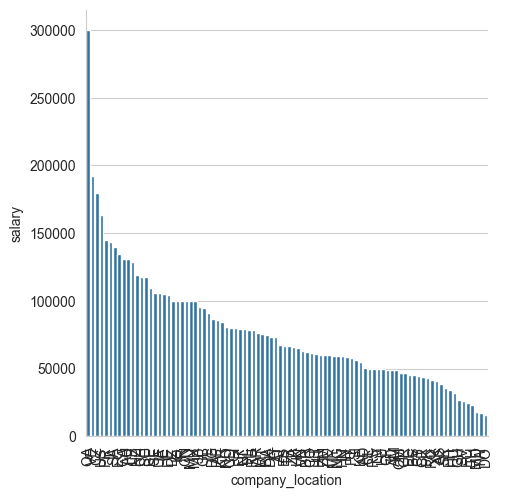

In [83]:
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT company_location, AVG (salary_in_usd)AS salary FROM salaries GROUP BY company_location ORDER BY salary DESC")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['company_location','salary']
sns.catplot (x= 'company_location' , y='salary', data= df, kind= 'bar')
plt.xticks(rotation = 90)

## 7.2 Impact of Region on Salaries

Text(0.5, 1.0, 'Impact of Region on Salaries')

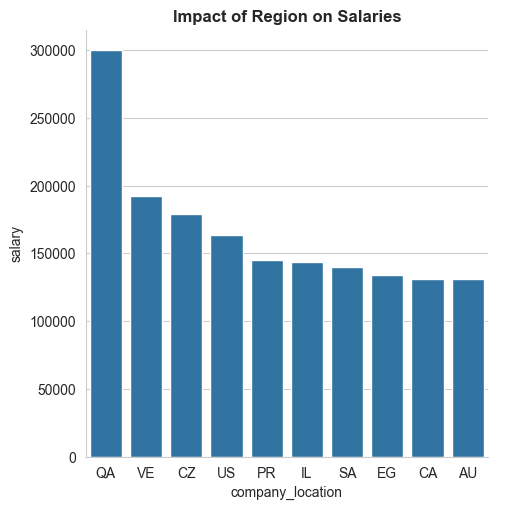

In [82]:
# QUESTION 8 Impact of Region on Salaries LIMIT 10
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT company_location, AVG (salary_in_usd)AS salary FROM salaries GROUP BY company_location ORDER BY salary DESC Limit 10")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['company_location','salary']
sns.catplot (x= 'company_location' , y='salary', data= df, kind= 'bar')
plt.title("Impact of Region on Salaries", weight = 'bold')

## 7.3 Impact of QA on Salaries about the time

Text(0.5, 1.0, 'Impact of QA on Salaries about the time')

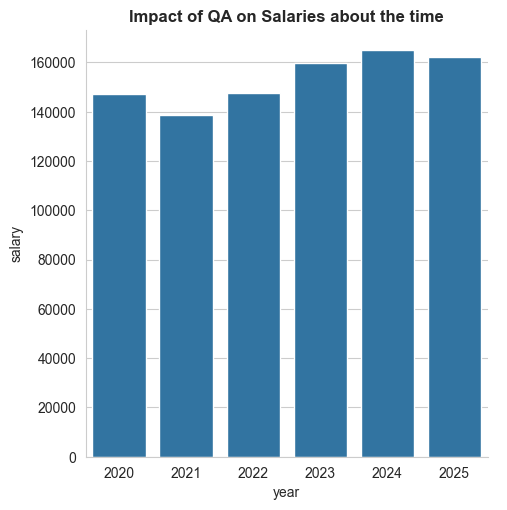

In [85]:
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT  work_year AS year, AVG (salary_in_usd)AS salary FROM salaries  WHERE company_location = 'US'  GROUP BY year ORDER BY year DESC  Limit 10")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['year','salary']
sns.catplot (x= 'year' , y='salary', data= df, kind= 'bar')
plt.title("Impact of QA on Salaries about the time", weight = 'bold')

## 8. Best Alternative to the US for Jobs LIMIT 10

Text(0.5, 1.0, 'Best Alternative to the US for Jobs LIMIT 10')

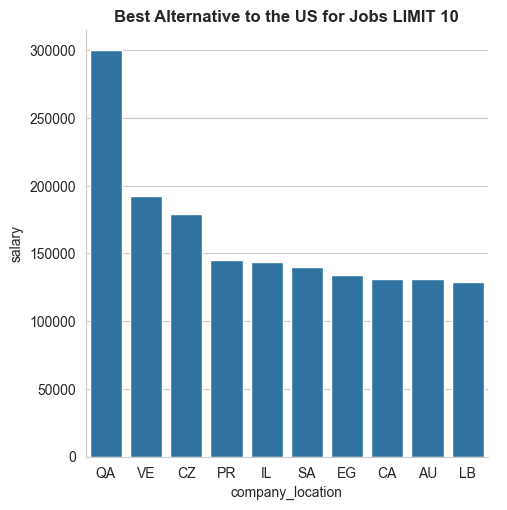

In [86]:
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT company_location, AVG(salary_in_usd) AS salary FROM salaries WHERE company_location != 'US' GROUP BY company_location ORDER BY salary DESC LIMIT 10")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['company_location','salary']
sns.catplot (x= 'company_location' , y='salary', data= df, kind= 'bar')
plt.title("Best Alternative to the US for Jobs LIMIT 10", weight = 'bold')

## 8.2. Company Size vs. Salary

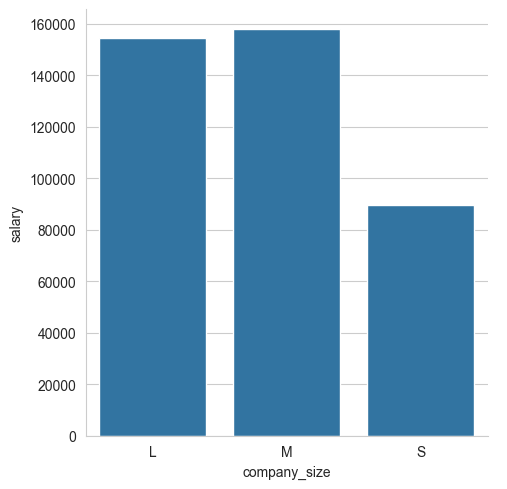

In [87]:
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT company_size, AVG (salary_in_usd) AS salary FROM salaries GROUP BY company_size ORDER BY company_size ASC")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['company_size','salary']
sns.catplot (x= 'company_size' , y='salary', data= df, kind= 'bar')

## 8.3 Company Size vs. Salary

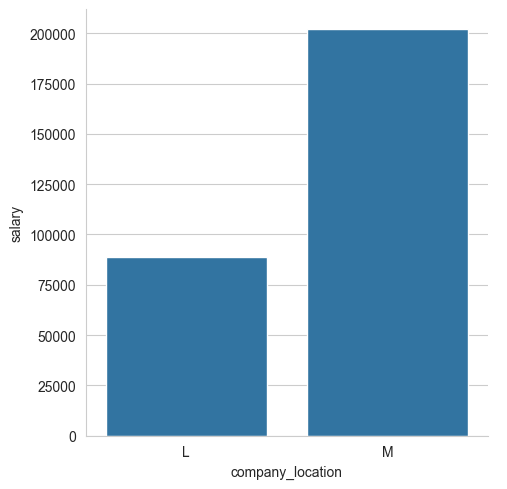

In [88]:
#QUESTION 10 Company Size vs. Salary
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT company_size, AVG(salary_in_usd) AS salary FROM salaries WHERE company_location = 'CZ' GROUP BY company_size ORDER BY company_size ASC")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['company_location','salary']
sns.catplot (x= 'company_location' , y='salary', data= df, kind= 'bar')

## 9. Remote Work Trends

### What proportion is remote? Identify which company sizes offer more remote work.

In [97]:
cur.execute("SELECT company_size, remote_ratio, COUNT(salaries) FROM salaries  GROUP BY company_size, remote_ratio ORDER BY company_size, remote_ratio DESC;")
rows = cur.fetchall()
df = pd.DataFrame(rows, columns=['company_size', 'remote_ratio', 'count'])
print(df)

  company_size  remote_ratio  count
0            L           100    357
1            L            50    192
2            L             0   2154
3            M           100  18232
4            M            50     62
5            M             0  67373
6            S           100    119
7            S            50     42
8            S             0     53


## 10. Remote Ratio Distribution in Large companies

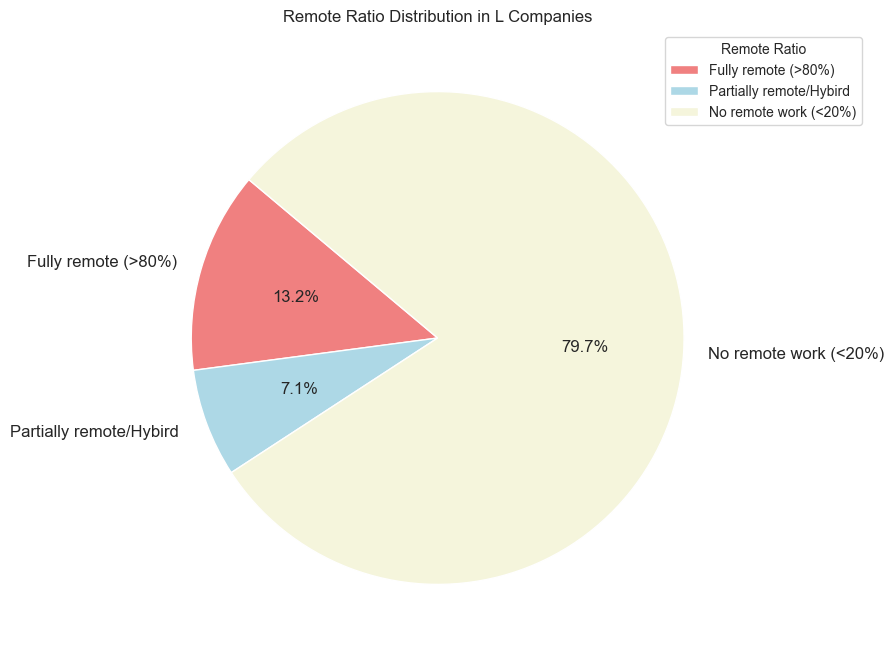

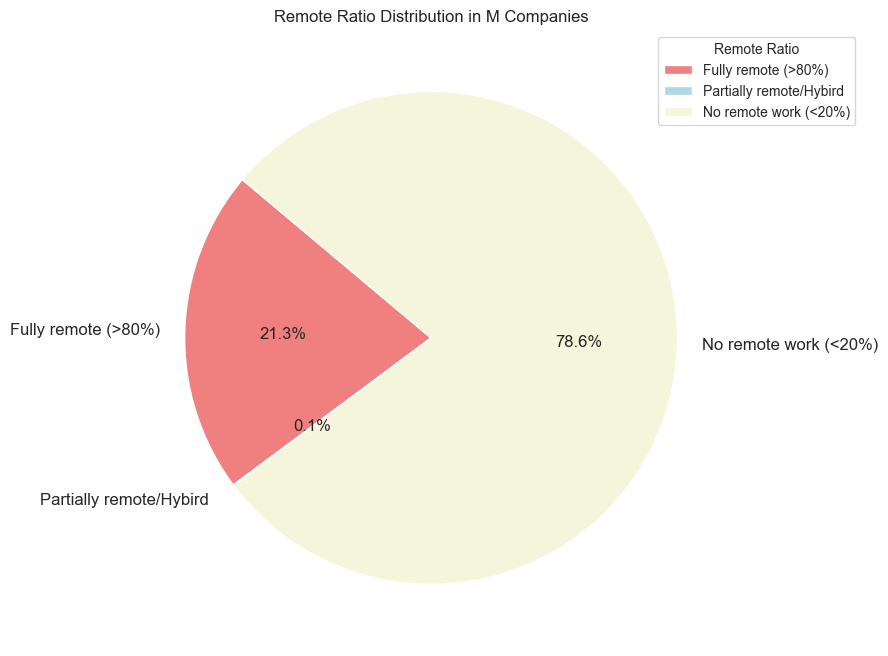

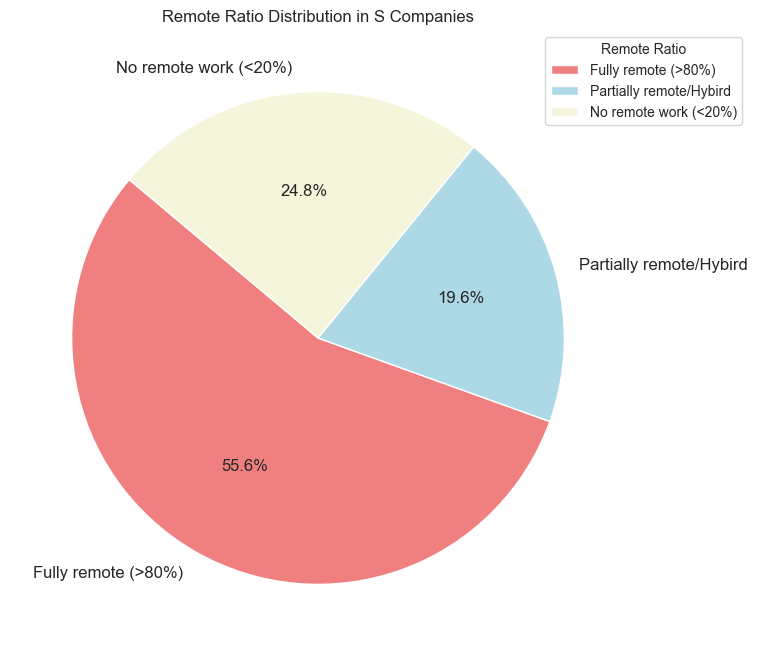

In [91]:
remote_ratio_labels = {
    0: "No remote work (<20%)",
    50: "Partially remote/Hybird ",
    100: "Fully remote (>80%)"
}

company_sizes = df['company_size'].unique()

for size in company_sizes:
    df_filtered = df[df['company_size'] == size]
    
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        df_filtered['count'], 
        labels = [remote_ratio_labels[r] for r in df_filtered['remote_ratio']],
        autopct = '%1.1f%%', 
        colors = ['lightcoral', 'lightblue', 'beige'], 
        startangle = 140,
        textprops = {'fontsize': 12}
    )
    
    plt.legend(wedges, 
               [remote_ratio_labels[r] for r in df_filtered['remote_ratio']],
               title = "Remote Ratio",
               loc = "upper right",
               bbox_to_anchor = (1.2, 1),
              ncol = 1)
    
    plt.title(f'Remote Ratio Distribution in {size} Companies')
    plt.show()

## 11. Remote ratio vc Company size

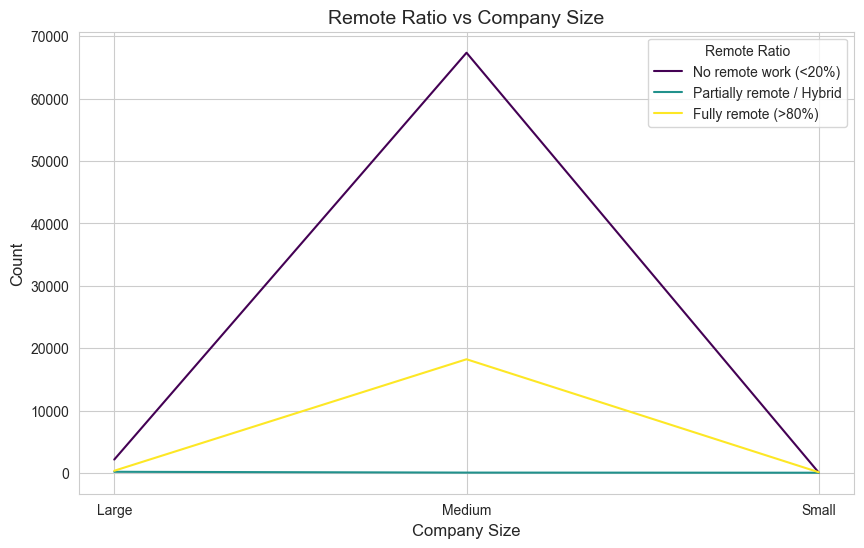

In [92]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df, x='company_size', y='count', hue='remote_ratio', palette='viridis')

plt.xticks(
    ['S', 'M', 'L'],
    labels=['Small', 'Medium', 'Large']
)

plt.title('Remote Ratio vs Company Size', fontsize=14)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Count', fontsize=12)

legend_labels = {
    0: "No remote work (<20%)",
    50: "Partially remote / Hybrid",
    100: "Fully remote (>80%)"
}

handles, labels = plt.gca().get_legend_handles_labels()

new_labels = [legend_labels.get(int(label), label) for label in labels]
plt.legend(handles, new_labels, title='Remote Ratio')

plt.show()

##### From these two charts, we can see that if you want to work remotely, you have a high chance of getting a remote job when all your interview opportunities are with small companies.

##### However, in terms of quantity, there are more remote opportunities available in medium-sized companies.

## 12. Best Paying Job Titles

#### List top-paying job titles.

In [101]:
df.loc[(df['experience_level'] == 'MI') & (df['job_title'] == 'Engineering Manager'), 'job_title'] = 'Engineering Manager(MI)'
print(df.loc[(df['experience_level'] == 'MI') & (df['job_title'] == 'Engineering Manager(MI)')])

    experience_level                job_title           avg_salary  count
153               MI  Engineering Manager(MI)  264678.948387096774    310


In [102]:
cur.execute("SELECT experience_level, job_title, AVG(salary_in_usd), COUNT(job_title) FROM salaries GROUP BY experience_level, job_title ORDER BY CASE WHEN experience_level = 'EN' THEN 1 WHEN experience_level = 'MI' THEN 2 WHEN experience_level = 'SE' THEN 3 WHEN experience_level = 'EX' THEN 4 END, AVG(salary_in_usd) DESC;")
rows = cur.fetchall()
df = pd.DataFrame(rows, columns=['experience_level', 'job_title', 'avg_salary', 'count'])

df['experience_level'] = df['experience_level'].str.strip()
df['job_title'] = df['job_title'].str.strip()

df.loc[(df['experience_level'] == 'MI') & (df['job_title'] == 'Engineering Manager'), 'job_title'] = 'Engineering Manager(MI)'

top_3_per_level = df.groupby('experience_level').head(3)

print(top_3_per_level)

    experience_level                      job_title           avg_salary  \
0                 EN                   Head of Data  240500.000000000000   
1                 EN            Engineering Manager  217800.000000000000   
2                 EN             Research Scientist  193336.691449814126   
152               MI                   AI Architect  800000.000000000000   
153               MI        Engineering Manager(MI)  264678.948387096774   
154               MI             AWS Data Architect  258000.000000000000   
370               SE  Analytics Engineering Manager  399880.000000000000   
371               SE         Data Science Tech Lead  375000.000000000000   
372               SE             Applied AI ML Lead  292500.000000000000   
630               EX       Principal Data Scientist  416000.000000000000   
631               EX       Head of Machine Learning  283573.545454545455   
632               EX                   AI Developer  276000.000000000000   

     count 

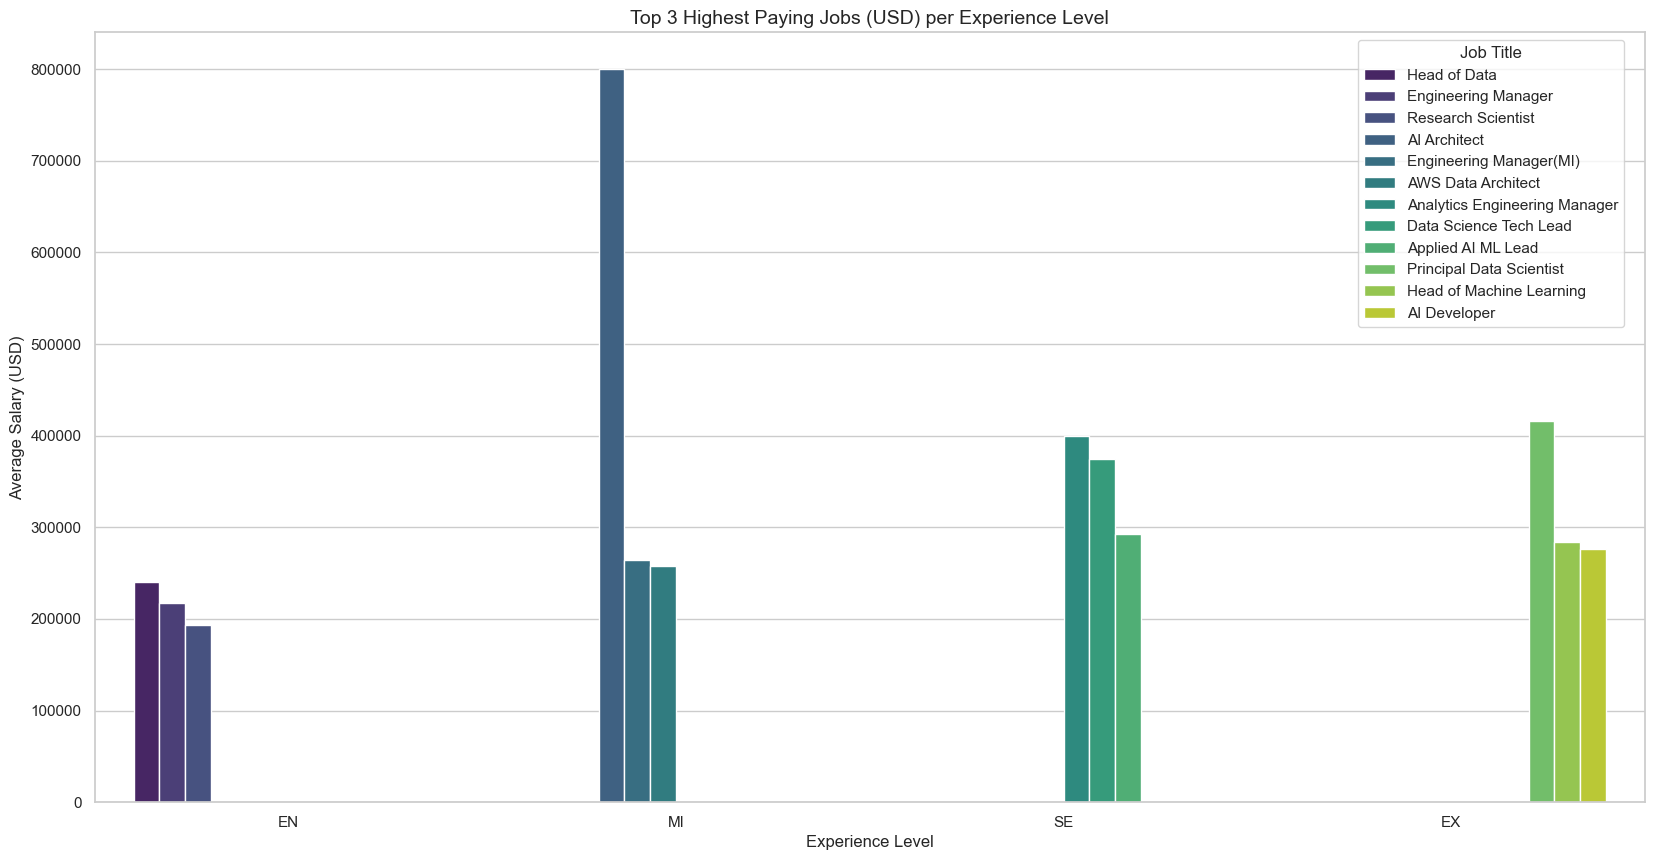

In [103]:
sns.set_theme(style = "whitegrid")

plt.figure(figsize = (20, 10))
top_3_per_level = df.groupby('experience_level').head(3)

sns.barplot(data = top_3_per_level, x = 'experience_level', y = 'avg_salary', hue = 'job_title', palette = 'viridis')

plt.title('Top 3 Highest Paying Jobs (USD) per Experience Level', fontsize = 14)
plt.xlabel('Experience Level', fontsize = 12)
plt.ylabel('Average Salary (USD)', fontsize = 12)
plt.legend(title = 'Job Title', bbox_to_anchor = (0.81,1),loc = 'upper left')

plt.show()

## 13. : Experience Level & Work Type Distribution.

#### See how experience level correlates with employment type.

In [104]:
cur.execute("SELECT experience_level, employment_type, AVG(salary_in_usd) AS avg_salary, COUNT(employment_type) AS employment_type_count FROM salaries  GROUP BY experience_level, employment_type ORDER BY CASE WHEN experience_level = 'EN' THEN 1 WHEN experience_level = 'MI' THEN 2 WHEN experience_level = 'SE' THEN 3 WHEN experience_level = 'EX' THEN 4 END, avg_salary DESC;")
rows = cur.fetchall()
df = pd.DataFrame(rows, columns=['experience_level', 'employment_type', 'avg_salary', 'employment_type_count'])
print(df)

   experience_level employment_type           avg_salary  \
0                EN              FT  101235.161480029405   
1                EN              PT   68571.121428571429   
2                EN              CT   61705.960000000000   
3                EN              FL   60000.000000000000   
4                MI              FT  143003.602872072478   
5                MI              CT  107892.805194805195   
6                MI              PT   71499.171875000000   
7                MI              FL   42179.666666666667   
8                SE              FT  173152.852695564360   
9                SE              PT  122075.068965517241   
10               SE              CT  115943.956521739130   
11               SE              FL   52891.166666666667   
12               EX              FT  200239.627155172414   
13               EX              CT  190618.666666666667   

    employment_type_count  
0                    8162  
1                     140  
2              

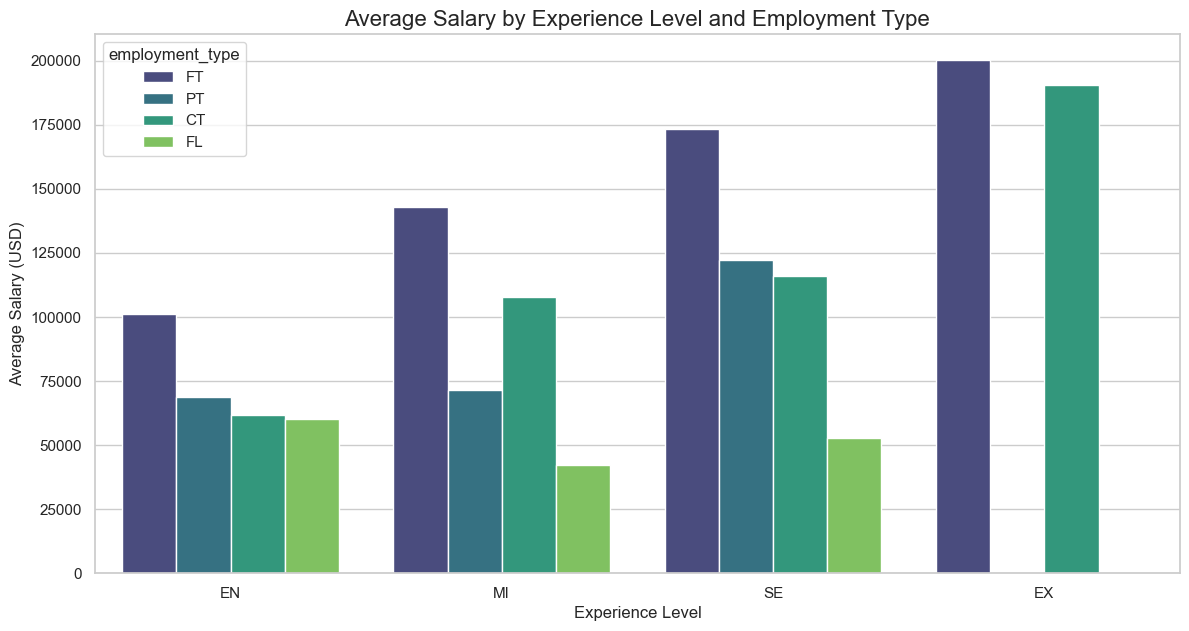

In [105]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))

sns.barplot(data=df, x='experience_level', y='avg_salary', hue='employment_type', palette='viridis')

plt.title('Average Salary by Experience Level and Employment Type', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)

plt.show()

## 14 : Industry Growth Trends.

### Check if the number of job positions is growing over the years.

In [107]:
cur.execute("SELECT work_year, COUNT(*) AS count_job FROM salaries GROUP BY work_year ORDER BY work_year DESC;")
rows = cur.fetchall()
df = pd.DataFrame(rows, columns=['work_year', 'count_job'])
print(df)

   work_year  count_job
0       2025      15875
1       2024      62234
2       2023       8522
3       2022       1660
4       2021        218
5       2020         75


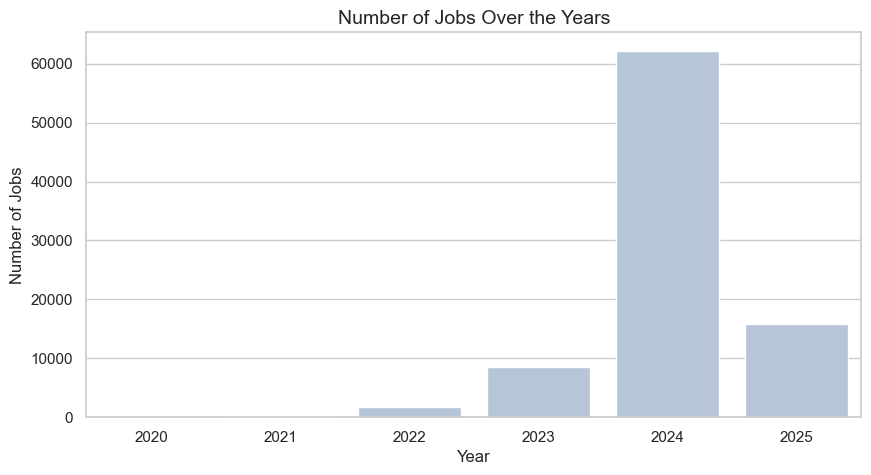

In [108]:
sns.set_theme(style="whitegrid")


plt.figure(figsize=(10, 5))

sns.barplot(data=df, x='work_year', y='count_job', color='lightsteelblue')

plt.title("Number of Jobs Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Jobs", fontsize=12)

plt.show()

In [109]:
cur.execute("SELECT experience_level, work_year, COUNT(*) AS count_job FROM salaries GROUP BY work_year, experience_level ORDER BY CASE WHEN experience_level = 'EN' THEN 1 WHEN experience_level = 'MI' THEN 2 WHEN experience_level = 'SE' THEN 3 WHEN experience_level = 'EX' THEN 4 END, work_year DESC;")
rows = cur.fetchall()
df = pd.DataFrame(rows, columns=['experience_level', 'work_year', 'count_job'])
print(df)

   experience_level  work_year  count_job
0                EN       2025       1549
1                EN       2024       6183
2                EN       2023        465
3                EN       2022        117
4                EN       2021         46
5                EN       2020         21
6                MI       2025       5023
7                MI       2024      19531
8                MI       2023       1717
9                MI       2022        359
10               MI       2021         87
11               MI       2020         31
12               SE       2025       8935
13               SE       2024      35329
14               SE       2023       6097
15               SE       2022       1141
16               SE       2021         75
17               SE       2020         19
18               EX       2025        368
19               EX       2024       1191
20               EX       2023        243
21               EX       2022         43
22               EX       2021    

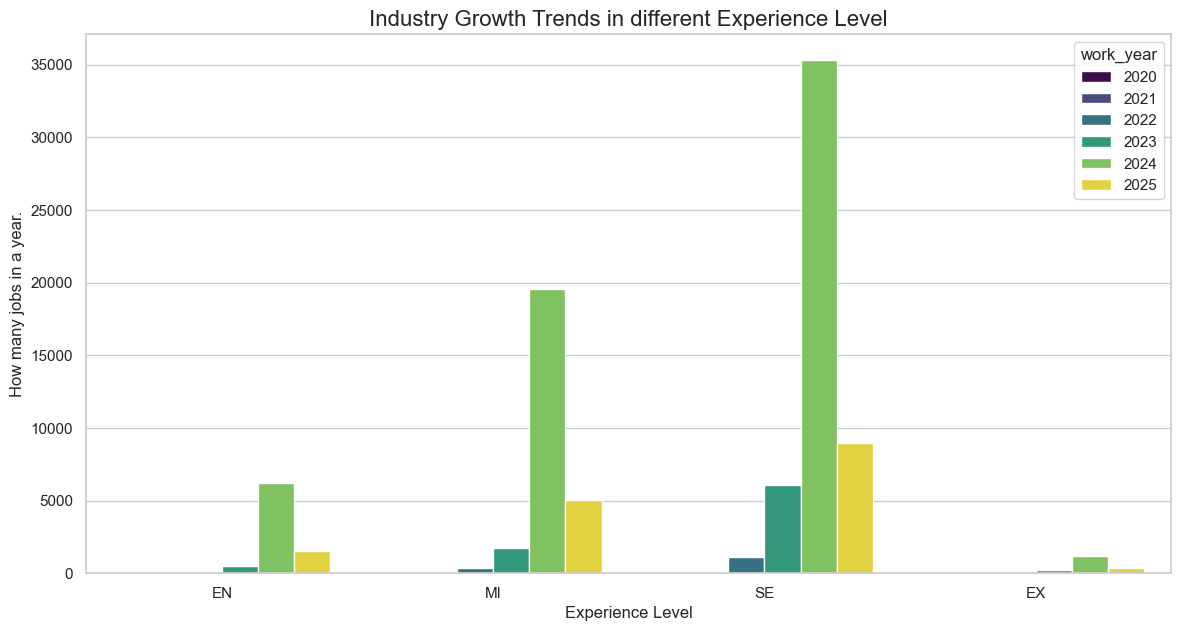

In [110]:
sns.set_theme(style = "whitegrid")

plt.figure(figsize = (14, 7))

sns.barplot(data = df, x = 'experience_level', y = 'count_job', hue = 'work_year', palette = 'viridis')

plt.title('Industry Growth Trends in different Experience Level', fontsize = 16)
plt.xlabel('Experience Level', fontsize = 12)
plt.ylabel('How many jobs in a year.', fontsize = 12)

plt.show()

In [111]:
cur.execute("SELECT employment_type, work_year, COUNT(*) AS count_job FROM salaries GROUP BY work_year, employment_type ORDER BY employment_type, work_year DESC;")
rows = cur.fetchall()
df = pd.DataFrame(rows, columns=['employment_type', 'work_year', 'count_job'])
print(df)

   employment_type  work_year  count_job
0               CT       2025         75
1               CT       2024        129
2               CT       2023         10
3               CT       2022          4
4               CT       2021          3
5               CT       2020          3
6               FL       2024          4
7               FL       2023          4
8               FL       2022          4
9               FL       2021          3
10              FL       2020          1
11              FT       2025      15742
12              FT       2024      61941
13              FT       2023       8505
14              FT       2022       1646
15              FT       2021        208
16              FT       2020         69
17              PT       2025         58
18              PT       2024        160
19              PT       2023          3
20              PT       2022          6
21              PT       2021          4
22              PT       2020          2


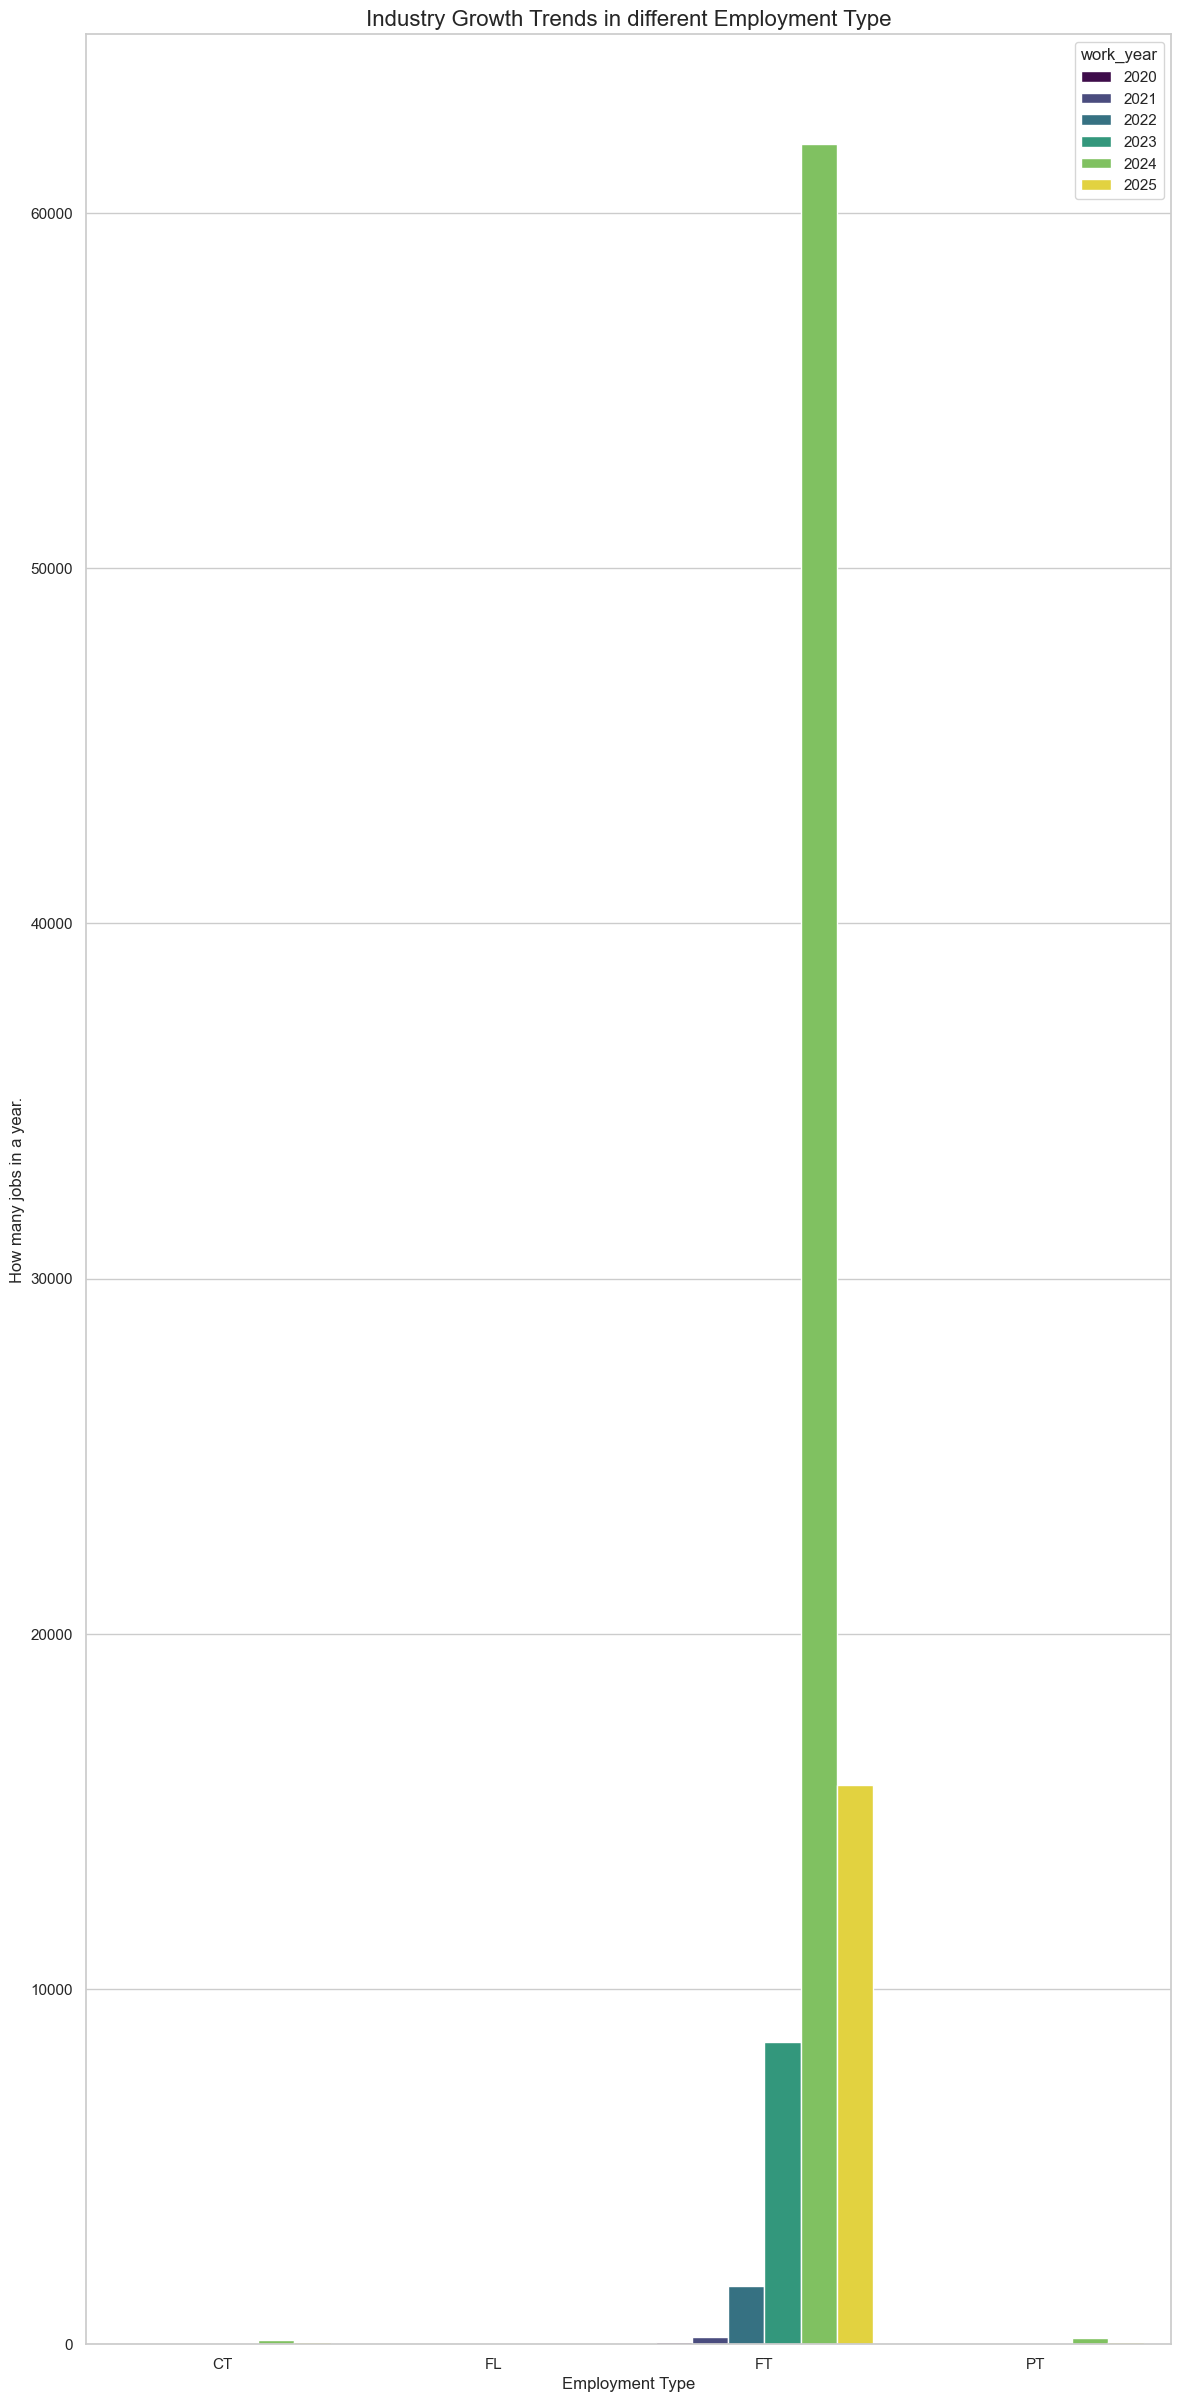

In [112]:
sns.set_theme(style = "whitegrid")

plt.figure(figsize = (14, 30))

sns.barplot(data = df, x = 'employment_type', y = 'count_job', hue = 'work_year', palette = 'viridis')

plt.title('Industry Growth Trends in different Employment Type', fontsize = 16)
plt.xlabel('Employment Type', fontsize = 12)
plt.ylabel('How many jobs in a year.', fontsize = 12)

plt.show()

In [113]:
cur.close()
conn.close()
print("Connection closed")

Connection closed
